# Compass Analysis

This notebook gives a small demo of analyzing the results of the compass algorithm and replicates figures 2E and 2C from the paper.

To install the required python packages, you can uncomment the "install_reqs()" call.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab

In [2]:
from matplotlib import __version__ as matplotlibversion
if matplotlibversion < "3.4":
    print("Matplotlib versions older than 3.4 may not be able to generate figure 2E, as they do not support alpha arrays")

The file "extdata/Th17/reactions.tsv" is the outputs of a compass run and "extdata/Th17/cell_metadata.csv" is cell metadata, in this case it is only used to know the condition of the Th17 cells (pathogenic vs. non-pathogenic). Commented out are alternative files to use for a microcpooled example.

In [3]:
foldername = "CRC_GSE123465"
dataname = "SMC02"
#cell_metadata  = pd.read_csv("data/{foldername}/{dataname}_cluster_metadata.csv".format(foldername=foldername,dataname=dataname), index_col=0)
reaction_penalties = pd.read_csv("data/{foldername}/{dataname}_reactions.tsv".format(foldername=foldername,dataname=dataname), sep="\t", index_col=0)

In [4]:
reaction_penalties

,SMC02.T_AAACGGGTCTGCCAGG,SMC02.T_AAAGCAAAGCTACCTA,SMC02.T_AACACGTGTGGAAAGA,SMC02.T_AACACGTTCTTAGCCC,SMC02.T_AACTCCCAGTCTCGGC,SMC02.T_AACTCTTAGACTAAGT,SMC02.T_AACTTTCGTTCGCTAA,SMC02.T_AAGACCTGTGACCAAG,SMC02.T_AAGGAGCAGATATGGT,SMC02.T_AAGGCAGAGAGTAATC,...,SMC02.T_TTGACTTGTGGTCTCG,SMC02.T_TTGCCGTTCACTATTC,SMC02.T_TTGGCAAAGTACGTTC,SMC02.T_TTGGCAATCAAGGTAA,SMC02.T_TTGGCAATCCAAAGTC,SMC02.T_TTTACTGAGACACGAC,SMC02.T_TTTACTGTCTGCAAGT,SMC02.T_TTTCCTCGTATAAACG,SMC02.T_TTTGCGCCAGATCCAT,SMC02.T_TTTGTCACAGTATAAG
10FTHF5GLUtl_pos,4226.677800,4524.674963,4216.497842,4536.888088,3803.055492,3639.541608,4453.067697,4041.876190,3793.143086,3695.389195,...,3907.495895,3816.501703,4713.869684,4666.126443,3729.174616,3779.838424,4557.046007,4328.314772,3938.391414,4050.446963
10FTHF5GLUtm_pos,6091.451915,6316.615467,6001.721404,5632.324497,5842.247040,5083.303654,6185.932351,6015.977813,5261.057706,5792.856013,...,5955.156558,5296.716419,6575.197023,6354.294299,5853.571742,5344.044724,6204.037462,6158.474705,5915.222099,5423.839419
10FTHF6GLUtl_pos,5248.266323,5726.817669,5237.354595,5549.312526,4571.650414,4312.666635,5614.183169,4957.407318,4557.467541,4397.144248,...,4737.282518,4568.345948,6032.242750,5955.954868,4450.946263,4532.621375,5747.503211,5413.500442,4794.945277,4949.724318
10FTHF6GLUtm_pos,6436.092850,6764.146646,6302.773949,6029.423676,6075.605882,5246.340275,6596.481876,6325.443242,5472.994604,5992.300727,...,6239.350867,5469.223851,7127.175299,6827.793400,6072.391496,5551.571962,6617.725673,6553.845409,6190.344181,5695.435000
10FTHF7GLUtl_pos,5884.273699,6446.265630,5814.310944,6077.751866,5084.047028,4673.163462,6257.442169,5526.870668,4951.306074,4864.980949,...,5290.473600,4922.338393,6887.157416,6681.905816,4932.127361,4956.068066,6326.970005,6020.494748,5352.381811,5377.679843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_pre_prot(r)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdec2coa(c)_neg,21548.516726,22501.050916,19307.675104,20887.380367,17997.655956,17803.959097,21110.211204,20759.510738,20569.290985,18948.753503,...,19540.740594,20291.074264,23007.382316,23339.632892,19067.725101,19354.071941,20988.352934,20458.871236,19064.308274,19780.233098
sink_tetdec2coa(c)_pos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sink_tetdece1coa(c)_neg,21548.516726,22501.050916,19307.675104,20887.380367,17997.655956,17803.959097,21110.211204,20759.510738,20569.290985,18948.753503,...,19540.740594,20291.074264,23007.382316,23339.632892,19067.725101,19354.071941,20988.352934,20458.871236,19064.308274,19780.233098


In [5]:
cell_metadata = pd.read_csv("data/{foldername}/{dataname}_cell_meta.csv".format(foldername=foldername,dataname=dataname),index_col = 0)
#cell_metadata = pd.read_csv("extdata/Th17-micropooled/cluster_metadata.csv", index_col = 0)

In [6]:
cell_metadata

,csc_marker_all,csc_addmodulescore
SMC02.T_AAACGGGTCTGCCAGG,cancer stem cell,cancer stem cell
SMC02.T_AAAGCAAAGCTACCTA,other,other
SMC02.T_AACACGTGTGGAAAGA,other,other
SMC02.T_AACACGTTCTTAGCCC,cancer stem cell,cancer stem cell
SMC02.T_AACTCCCAGTCTCGGC,cancer stem cell,other
...,...,...
SMC02.T_TTTACTGAGACACGAC,cancer stem cell,other
SMC02.T_TTTACTGTCTGCAAGT,cancer stem cell,other
SMC02.T_TTTCCTCGTATAAACG,cancer stem cell,other
SMC02.T_TTTGCGCCAGATCCAT,cancer stem cell,cancer stem cell


In [7]:
# pathogenic Th17 = Th17p; non-pathogenic Th17 = Th17n
Th17p_cells = cell_metadata.index[cell_metadata['csc_addmodulescore'] == 'cancer stem cell']
Th17n_cells = cell_metadata.index[cell_metadata['csc_addmodulescore'] == 'other']

The reaction metadata for RECON2 is stored here. We'll be using the confidence scores and the subsystem groupings to filter out reactions and group them for analysis.

In [8]:
reaction_metadata = pd.read_csv("extdata/RECON2/reaction_metadata.csv", index_col = 0) 

Here is one example of a row for the reaction metadata:

The numbers in the reactions tsv correspond to penalties for each reaction per cell, so we take the negative log to get scores that are higher the more active the reaction is predicted to be. This also drops reactions that are close to constant and therefore not informative for the comparison.

In [9]:
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [10]:
df = -np.log(reaction_penalties + 1)

In [11]:
min_range=1e-3
df = df[df.max(axis=1) - df.min(axis=1) >= min_range]

In [12]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [13]:
reaction_consistencies 

,SMC02.T_AAACGGGTCTGCCAGG,SMC02.T_AAAGCAAAGCTACCTA,SMC02.T_AACACGTGTGGAAAGA,SMC02.T_AACACGTTCTTAGCCC,SMC02.T_AACTCCCAGTCTCGGC,SMC02.T_AACTCTTAGACTAAGT,SMC02.T_AACTTTCGTTCGCTAA,SMC02.T_AAGACCTGTGACCAAG,SMC02.T_AAGGAGCAGATATGGT,SMC02.T_AAGGCAGAGAGTAATC,...,SMC02.T_TTGACTTGTGGTCTCG,SMC02.T_TTGCCGTTCACTATTC,SMC02.T_TTGGCAAAGTACGTTC,SMC02.T_TTGGCAATCAAGGTAA,SMC02.T_TTGGCAATCCAAAGTC,SMC02.T_TTTACTGAGACACGAC,SMC02.T_TTTACTGTCTGCAAGT,SMC02.T_TTTCCTCGTATAAACG,SMC02.T_TTTGCGCCAGATCCAT,SMC02.T_TTTGTCACAGTATAAG
10FTHF5GLUtl_pos,3.651401,3.583287,3.653812,3.580592,3.756986,3.800921,3.599236,3.696097,3.759595,3.785697,...,3.729901,3.753457,3.542332,3.552510,3.776599,3.763108,3.576160,3.627644,3.722027,3.693980
10FTHF5GLUtm_pos,3.286003,3.249712,3.300841,3.364354,3.327767,3.466896,3.270614,3.298469,3.432531,3.336256,...,3.308628,3.425778,3.209597,3.243765,3.325831,3.416884,3.267692,3.275062,3.315356,3.402065
10FTHF6GLUtl_pos,3.434965,3.347719,3.437046,3.379199,3.572961,3.631265,3.367579,3.491969,3.576067,3.611871,...,3.537379,3.573684,3.295769,3.308494,3.599712,3.581533,3.344114,3.403973,3.525283,3.493520
10FTHF6GLUtm_pos,3.230977,3.181270,3.251905,3.296236,3.288607,3.435332,3.206366,3.248315,3.393045,3.302411,...,3.262017,3.393734,3.128998,3.171906,3.289136,3.378792,3.203151,3.212849,3.269901,3.353213
10FTHF7GLUtl_pos,3.320600,3.229398,3.332559,3.288254,3.466749,3.551003,3.259122,3.383251,3.493200,3.510785,...,3.426957,3.499067,3.163250,3.193501,3.497081,3.492239,3.248074,3.297718,3.415325,3.410611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,2.022700,1.979447,2.132499,2.053861,2.202757,2.213577,2.043249,2.060001,2.069206,2.151263,...,2.120501,2.082823,1.957195,1.942858,2.145004,2.130099,2.049038,2.074588,2.145183,2.108320
sink_octdececoa(c)_neg,1.666613,1.644997,1.785009,1.746791,1.874955,1.853848,1.734981,1.703856,1.735015,1.845920,...,1.740933,1.744913,1.619509,1.614529,1.769990,1.829655,1.737148,1.729781,1.806149,1.797170
sink_pre_prot(r)_neg,7.485325,7.464052,7.647293,7.515369,7.758668,7.752785,7.528639,7.635998,7.583443,7.684509,...,7.643887,7.609575,7.452207,7.456450,7.722878,7.689018,7.564889,7.633216,7.686089,7.651892
sink_tetdec2coa(c)_neg,2.022700,1.979447,2.132499,2.053861,2.202757,2.213577,2.043249,2.060001,2.069206,2.151263,...,2.120501,2.082823,1.957195,1.942858,2.145004,2.130099,2.049038,2.074588,2.145183,2.108320


We use the unpaired Wilcoxon rank-sum test (equivlanet to the Mann–Whitney U test) to analyze which reactions are predicted to be more active in pathogenic Th17p cells compared to the non-pathogenic Th17n cells. Positive values indicate higher potential activity in Th17p. 

In [14]:
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_cells, Th17n_cells)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

Next we join the metadata to the reactions in a new dataframe W, so that we can filter out non-core reactions. More specifically, we remove reactions with confidence other than 0 or 4 (4 = most confident; 0 = unassigned confidence) and filter out reactions in the citric acid cycle subsystem which are outside of the mitochondria.

In [15]:
W = wilcox_results.merge(reaction_metadata, how='left', 
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

Here is one example of a row of the reuslting dataframe for a reaction:

In [16]:
wilcox_results.loc[['r0281_pos']]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
r0281_pos,11416.0,0.237704,0.226112,0.341148,r0281


The "_neg" or "_pos" suffixes indicate one direction of a bidirectional reaction. The "_pos" direction indicates positive flux through the reaction. For this example reaction it indicates water, oxygen, and putrescine are being consumed by this reaction to produce ammonium, hyrodgen peroxide, and 4-Aminobutanal.

In [17]:
reaction_metadata.loc['r0281']['formula']

'1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putrescine [e] --> 1.00 * Ammonium [e] + 1.00 * Hydrogen peroxide [e] + 1.00 * 4-Aminobutanal [e]\r\nAOC1'

In [18]:
W

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_neg,12909.0,0.002060,0.437897,0.033414,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
2HBO_pos,12215.0,0.027950,0.324534,0.128362,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,11988.0,0.056272,0.297174,0.167141,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,12379.5,0.015508,0.265762,0.096842,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,12379.5,0.015508,0.265762,0.096842,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1467_neg,11974.0,0.043617,0.212020,0.147514,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1467_pos,12687.0,0.005130,0.432612,0.056943,r1467,Postulated transport reaction,1.00 * Octadecenoyl-CoA (n-C18:1CoA) [c] --> 1...,NaN,"Transport, mitochondrial",2.3.1.86,0.0
r1487_pos,11874.0,0.077766,0.306651,0.186702,r1487,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
r1488_pos,11689.0,0.126442,0.262413,0.242734,r1488,EC:6.2.1.3,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,NaN,Fatty acid oxidation,6.2.1.3,0.0


### Optional: Metareaction analysis
[Metareactions](#Metareactions) are used in the paper rather than single reaction analysis and the section at the bottom of this notebook performs the same analysis using reactions clustered into metareactions.

#### Set the reaction labels

In [19]:
import pandas as pd
# Load the CSV file
# Filter based on reaction name
name_filter = W['reaction_name'].str.contains('linoleic|linolenic|L-carnitine', case=False, na=False)

# Filter based on reaction formula
formula_filter = W['formula'].str.contains('lino', case=False, na=False)

# Combine both filters
filtered_df = W[name_filter | formula_filter]

# Create the dictionary
labeled_reactions = filtered_df.set_index(filtered_df.index)['reaction_name'].to_dict()


#### box plot for each reaction in FAO

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf_backend
# Example DataFrames and Series
# reaction_matrix = pd.read_csv('reaction_matrix.csv', index_col=0) # Load your matrix file
# metadata = pd.read_csv('metadata.csv', index_col=0, squeeze=True) # Load your metadata file

# Extract the reactions from the matrix based on reaction_label
reaction_ids = list(labeled_reactions.keys())
subset_matrix = reaction_consistencies .loc[reaction_ids]
transposed_matrix = subset_matrix.T
transposed_matrix.reset_index(inplace=True)
transposed_matrix.rename(columns={'index': 'cell'}, inplace=True)
pdf_pages = pdf_backend.PdfPages("plot/{foldername}/{dataname}_csc_addmodulescore.pdf".format(foldername=foldername,dataname=dataname))
# Combine with metadata to create a long-form DataFrame for plotting
# Transpose subset_matrix to get cells as rows
melted_matrix = transposed_matrix.melt(id_vars='cell', value_vars=reaction_ids,
                                      var_name='reaction_id', value_name='value')

# Map reaction_ids to reaction_names
melted_matrix['reaction_name'] = melted_matrix['reaction_id'].map(labeled_reactions)

# Add metadata to melted_matrix
melted_matrix = melted_matrix.join(cell_metadata, on='cell')

# Plot the boxplots
plt.figure(figsize=(5, 5))
palette = {
    'cancer stem cell': 'pink',
    'other': 'lightgreen'
}
# Loop through each reaction and plot
for reaction in reaction_ids:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=melted_matrix[melted_matrix['reaction_id'] == reaction],
                x='csc_addmodulescore', y='value', palette=palette)
    plt.title(f'Boxplot of {labeled_reactions[reaction]}')
    plt.xlabel('Cell Type')
    plt.ylabel('Value')
    pdf_pages.savefig()
    plt.close()
pdf_pages.close()

<Figure size 360x360 with 0 Axes>

### Figure 2C replication

In [23]:
from adjustText import adjust_text

def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-2.2, 2.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08), 
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('cancer stem cells', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08), 
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('other cancer cells', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    # Track already annotated labels
    annotated_labels = set()
    texts = []
    
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            
            # Only annotate if the label has not been annotated yet
            if labeled_reactions[r] not in annotated_labels:
                offset = (20, 0) if x >= 0 else (-100, -40)
                texts.append(axs.text(x, y, labeled_reactions[r], 
                                      fontsize=8, ha='right', va='bottom', 
                                      bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='none')))
                annotated_labels.add(labeled_reactions[r])
                
    # Adjust text positions to avoid overlap
    adjust_text(texts, 
                expand_text=(1.2, 1.2), 
                expand_points=(1.2, 1.2), 
                arrowprops=dict(arrowstyle='->', color='gray'))

    plt.show()

In [24]:
filtered_data = pd.concat([W[W['subsystem'] == "Glycolysis/gluconeogenesis"],
             W[W['subsystem'] == "Citric acid cycle"],
            W[W['subsystem'].isin(amino_acid_metab)],
           W[W['subsystem'] == "Fatty acid oxidation"]])

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


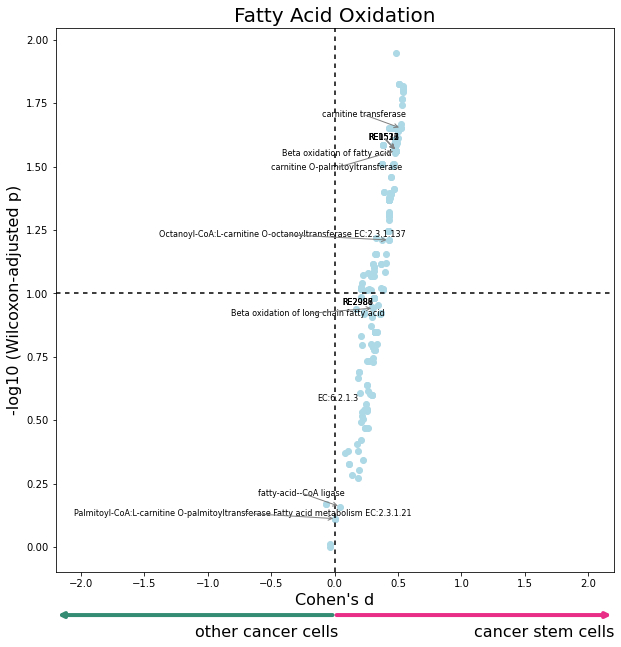

In [25]:
data = W[W['subsystem'] == "Fatty acid oxidation"]
plot_differential_scores(data, "Fatty Acid Oxidation", c="lightblue")

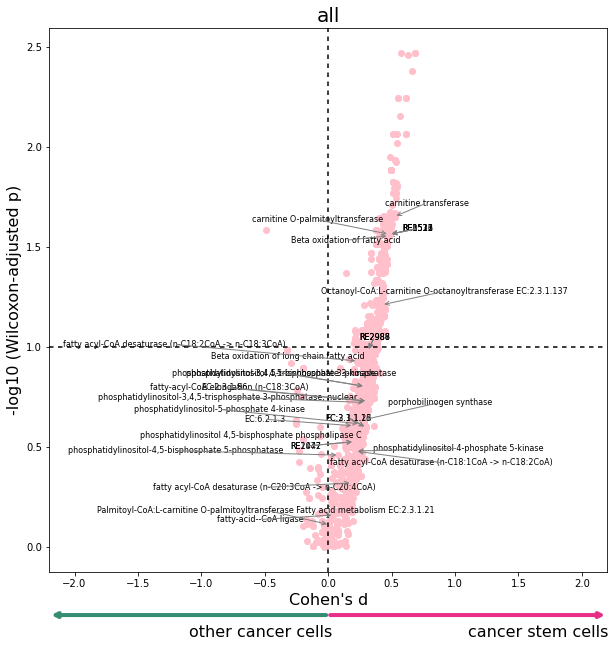

In [26]:
data = W
plot_differential_scores(data, title='all', c="pink")

#### Box plot of FAO score

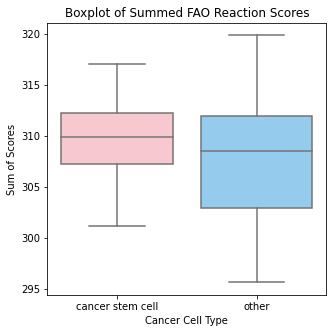

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrames and Series
# reaction_matrix = pd.read_csv('reaction_matrix.csv', index_col=0) # Load your matrix file
# metadata = pd.read_csv('metadata.csv', index_col=0, squeeze=True) # Load your metadata file

# Extract the reactions from the matrix based on reaction_label
reaction_ids = list(labeled_reactions.keys())
subset_matrix = reaction_consistencies .loc[reaction_ids]
transposed_matrix = subset_matrix.T
transposed_matrix.reset_index(inplace=True)
transposed_matrix.rename(columns={'index': 'cell'}, inplace=True)

transposed_matrix['sum'] = transposed_matrix[labeled_reactions.keys()].sum(axis=1)
transposed_matrix = transposed_matrix.join(cell_metadata, on='cell')
palette = {
    'cancer stem cell': 'pink',
    'other': 'lightskyblue'
}
plt.figure(figsize=(5, 5))
sns.boxplot(data=transposed_matrix, x='csc_addmodulescore', y='sum', palette=palette)
plt.title('Boxplot of Summed FAO Reaction Scores')
plt.xlabel('Cancer Cell Type')
plt.ylabel('Sum of Scores')
plt.show()

### Figure 2E replication

In [27]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

Text(0.5, 0, "Cohen's d")

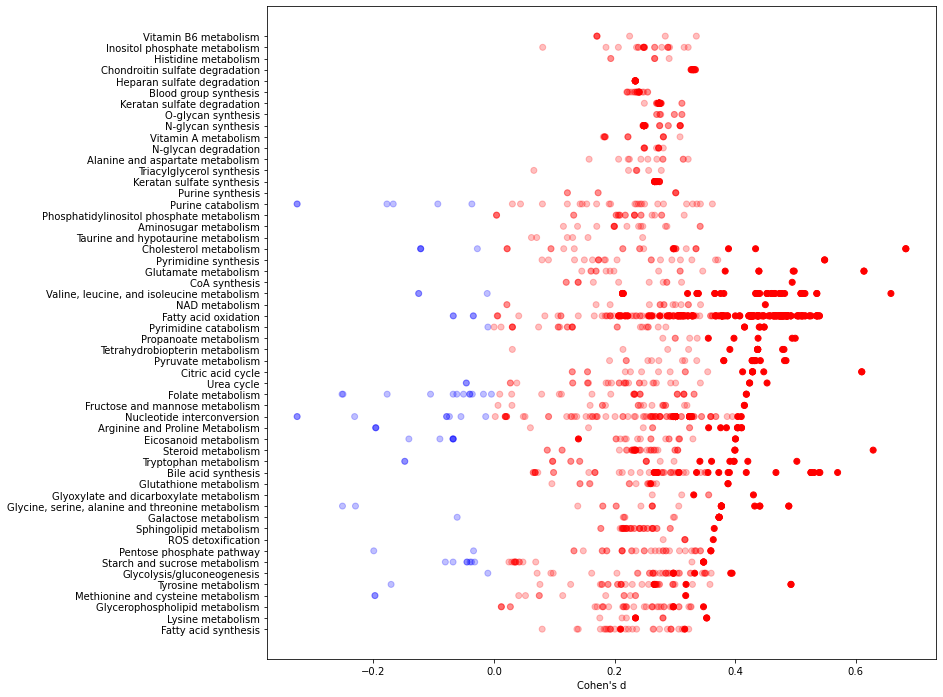

In [28]:
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")

#### box plot of FAO score in each cluster

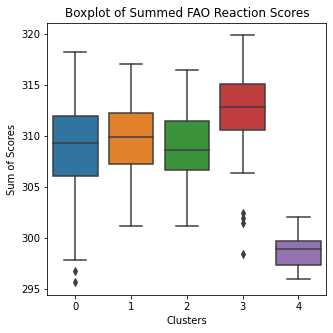

In [29]:
cell_metadata = pd.read_csv("data/{foldername}/{dataname}_cluster_meta.csv".format(foldername=foldername,dataname=dataname),index_col = 0)
#cell_metadata = pd.read_csv("extdata/Th17-micropooled/cluster_metadata.csv", index_col = 0)import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrames and Series
# reaction_matrix = pd.read_csv('reaction_matrix.csv', index_col=0) # Load your matrix file
# metadata = pd.read_csv('metadata.csv', index_col=0, squeeze=True) # Load your metadata file

# Extract the reactions from the matrix based on reaction_label
reaction_ids = list(labeled_reactions.keys())
subset_matrix = reaction_consistencies .loc[reaction_ids]
transposed_matrix = subset_matrix.T
transposed_matrix.reset_index(inplace=True)
transposed_matrix.rename(columns={'index': 'cell'}, inplace=True)

transposed_matrix['sum'] = transposed_matrix[labeled_reactions.keys()].sum(axis=1)
transposed_matrix = transposed_matrix.join(cell_metadata, on='cell')
plt.figure(figsize=(5, 5))
sns.boxplot(data=transposed_matrix, x='seurat_clusters', y='sum')
plt.title('Boxplot of Summed FAO Reaction Scores')
plt.xlabel('Clusters')
plt.ylabel('Sum of Scores')
plt.show()

In [30]:
transposed_matrix = subset_matrix.T
transposed_matrix.reset_index(inplace=True)
transposed_matrix.rename(columns={'index': 'cell'}, inplace=True)
    
# Melt the matrix for long-form DataFrame
melted_matrix = transposed_matrix.melt(id_vars='cell', value_vars=reaction_ids,
                                       var_name='reaction_id', value_name='value')
    
# Map reaction_ids to reaction_names
melted_matrix['reaction_name'] = melted_matrix['reaction_id'].map(labeled_reactions)
    
melted_matrix = melted_matrix.join(cell_metadata, on='cell')
    
# Process data for all reactions
transposed_matrix['sum'] = transposed_matrix[reaction_ids].sum(axis=1)
df = transposed_matrix.join(cell_metadata, on='cell')

In [31]:
def classify_value(value):
    if value <= 305:
        return 'low'
    elif 305 < value <= 310:
        return 'mid'
    else:
        return 'high'
results = []
celltype_column = "seurat_clusters"
sum_column = "sum"
for celltype in df[celltype_column].unique():
    celltype_df = df[df[celltype_column] == celltype]
    # Calculate top 25% and top 75% thresholds
    top_50 = celltype_df[sum_column].quantile(0.5)
    celltype_df['classification'] = classify_value(top_50)
    # Collect results
    results.append(celltype_df[['cell', 'classification']])
            
     # Combine results and save to a new file
    results_df = pd.concat(results, ignore_index=True)
    output_file_path = f"data/{foldername}/{dataname}_classified.csv"
    results_df.to_csv(output_file_path, index=False)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\3099571553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['classification'] = classify_value(top_50)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\3099571553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['classification'] = classify_value(top_50)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\3099571553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

#### classifed cluster in to low/medium/high group based on their FAO medium value

In [32]:
transposed_matrix = subset_matrix.T
transposed_matrix.reset_index(inplace=True)
transposed_matrix.rename(columns={'index': 'cell'}, inplace=True)
    
# Melt the matrix for long-form DataFrame
melted_matrix = transposed_matrix.melt(id_vars='cell', value_vars=reaction_ids,
                                       var_name='reaction_id', value_name='value')
    
# Map reaction_ids to reaction_names
melted_matrix['reaction_name'] = melted_matrix['reaction_id'].map(labeled_reactions)
    
melted_matrix = melted_matrix.join(cell_metadata, on='cell')
    
# Process data for all reactions
transposed_matrix['sum'] = transposed_matrix[reaction_ids].sum(axis=1)
df = transposed_matrix.join(cell_metadata, on='cell')

In [33]:
def classify_value(value):
    if value <= 305:
        return 'low'
    elif 305 < value <= 310:
        return 'mid'
    else:
        return 'high'
results = []
celltype_column = "seurat_clusters"
sum_column = "sum"
for celltype in sorted(df[celltype_column].unique()):
    celltype_df = df[df[celltype_column] == celltype]
    # Calculate top 25% and top 75% thresholds
    top_50 = celltype_df[sum_column].quantile(0.5)
    print(classify_value(top_50))
    celltype_df['classification'] = classify_value(top_50)
    # Collect results
    results.append(celltype_df[['cell', 'classification']])
            
     # Combine results and save to a new file
    results_df = pd.concat(results, ignore_index=True)
    output_file_path = f"data/{foldername}/{dataname}_classified.csv"
    results_df.to_csv(output_file_path, index=False)

mid
mid
mid
high
low


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\2870572520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['classification'] = classify_value(top_50)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\2870572520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['classification'] = classify_value(top_50)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_9484\2870572520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc